In [ ]:
import keras
keras.__version__

'2.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil
# shutil : Shell Script Utility , 리눅스 같은 명령어를 쓸수있게 해주는 유틸리티

In [ ]:
original_dataset_dir = './drive/MyDrive/datasets/cats_and_dogs/train'
# 원본 데이터셋을 압축 해제한 디렉터리 경로

base_dir ='./drive/MyDrive/datasets/cats_and_dogs_small'
#소규모 데이터 셋을 저장할 디렉터리
#if os.path.exists(base_dir): #해당되는 경로가 있는지를 확인한다.
#  shutil.rmtree(base_dir) #삭제를 하는 코드
#os.mkdir(base_dir)

#훈련, 검증, 테스트 분할을 위한 디렉터리.
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

#훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

#훈련용 강자이 사진 디렉터리
train_dogs_dir = os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)


#검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)

#검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)

#테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)

#테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)


#처음 1000개의 고양이 이미지를 train_cats_dir 에 복사합니다.
print('Copy files....')
print('---Training file(s) (cat)....')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # in의 값이 i에 반복될때마다 format(i) 의 i에 들어간다.
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
#  shutil.copy(src,dst)
#다음 500개의 고양이 이미지를 validation_cats_dir 에 복사합니다.
print('---Validation file(s) (cat)....')
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
#  shutil.copy(src,dst)
#다음 500개의 고양이 이미지를 test_cats_dir 에 복사합니다.
print('---Test file(s) (cat)....')
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
#  shutil.copy(src,dst)
#처음 1000개의 강아지 이미지를 train_dogs_dir 에 복사합니다.
print('---Training file(s) (dog)....')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
#  shutil.copy(src,dst)
#다음 500개의 강아지 이미지를 validation_dogs_dir 에 복사합니다.
print('---Validation file(s) (dog)....')
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
#  shutil.copy(src,dst)
#다음 500개의 강아지 이미지를 test_dogs_dir 에 복사합니다.
print('---Test file(s) (dog)....')
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
#  shutil.copy(src,dst)

Copy files....
---Training file(s) (cat)....
---Validation file(s) (cat)....
---Test file(s) (cat)....
---Training file(s) (dog)....
---Validation file(s) (dog)....
---Test file(s) (dog)....


In [ ]:
print('훈련용 고양이 이미지:', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지:', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지:', len(os.listdir(test_cats_dir)))

print('훈련용 강아지 이미지:', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지:', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지: 1000
검증용 고양이 이미지: 500
테스트용 고양이 이미지: 500
훈련용 강아지 이미지: 1000
검증용 강아지 이미지: 500
테스트용 강아지 이미지: 500


In [ ]:
#신경망 만들기 
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#개 또는 고양이라서 마지막에 출력값은 1개만 있으면 된다.
#sigmoid :결과를 분명히 하게 하기위함. 변별력.

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# 이미지 스케일을 위한 도구

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.fit_generator(
    train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data = validation_generator,
    validation_steps = 50
)
# fit_gernerator : 이미지를 변환하면서 학습한다.
# steps_per_epoch : epoch 별로 하는 스텝

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 18s 171ms/step - loss: 0.6903 - acc: 0.5395 - val_loss: 0.6728 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6532 - acc: 0.6255 - val_loss: 0.6452 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 17s 168ms/step - loss: 0.6045 - acc: 0.6690 - val_loss: 0.6884 - val_acc: 0.5980
Epoch 4/30
100/100 [==============================] - 16s 164ms/step - loss: 0.5739 - acc: 0.6985 - val_loss: 0.6118 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 16s 160ms/step - loss: 0.5453 - acc: 0.7255 - val_loss: 0.5864 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 16s 165ms/step - loss: 0.5211 - acc: 0.7415 - val_loss: 0.6862 - val_acc: 0.6330
Epoch 7/30
100/100 [==============================] - 17s 167ms/step - loss: 0.4976 - acc: 0.7525 - val_loss: 0.5851 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 2

In [ ]:
model.save('cats_and_dogs_small_1.h5')
#학습한 데이터를 저장한다.

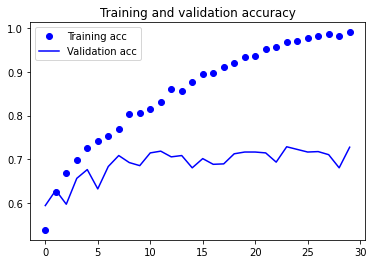

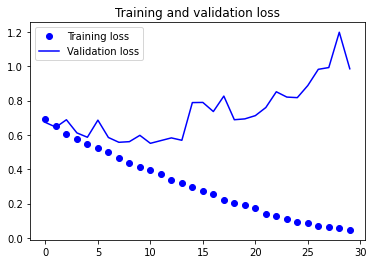

In [ ]:
history = model.history

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

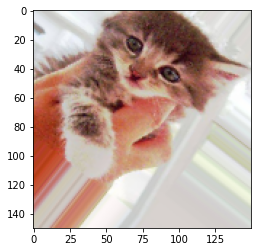

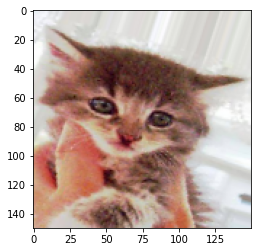

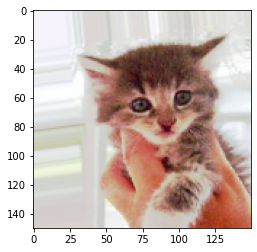

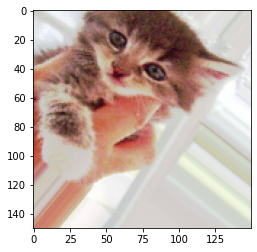

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,#각도를 40도를 돌린다
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,#수평으로 좌우를 바꿔서 증식한다
      fill_mode='nearest')#이동했을때 빈공간을 뭘로 채울것인가. nearest: 근처의색으로 채워준다.

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

#학습용 데이터는 증식을 시켜도 되지만, 검증용,테스트용 데이터는 증식시키면안된다.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)



# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
# 타깃 디렉터리
train_dir,
# 모든 이미지를 150 × 150 크기로 바꿉니다
target_size=(150, 150),
batch_size=20,
# binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')



history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 [==============================] - 27s 264ms/step - loss: 0.6546 - acc: 0.6015 - val_loss: 0.6437 - val_acc: 0.6060
Epoch 2/100
100/100 [==============================] - 26s 262ms/step - loss: 0.6429 - acc: 0.6180 - val_loss: 0.6390 - val_acc: 0.6230
Epoch 3/100
100/100 [==============================] - 26s 262ms/step - loss: 0.6286 - acc: 0.6360 - val_loss: 0.6147 - val_acc: 0.6560
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6211 - acc: 0.6525 - val_loss: 0.5966 - val_acc: 0.6840
Epoch 5/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6000 - acc: 0.6730 - val_loss: 0.6572 - val_acc: 0.6090
Epoch 6/100
100/100 [==============================] - 26s 264ms/step - loss: 0.6059 - acc: 0.6695 - val_loss: 0.5880 - val_acc: 0.6840
Epoch 7/100
100/100 [==============================] - 26s 263ms/step - loss: 0.5854 - acc: 0.6815 - val_loss: 0.5883 - val_acc: 0.6830
Epoch 8/100
100/100 [===========================

In [ ]:
model.save('cats_and_dogs_small_2.h5')

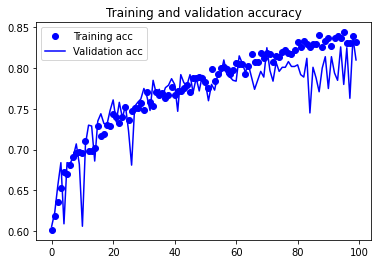

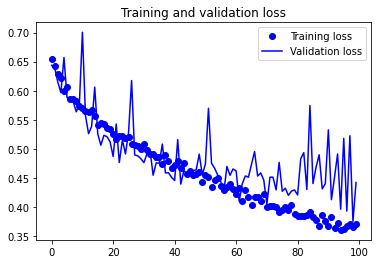

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']



epochs = range(len(acc))



plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()



plt.figure()



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()